In [3]:
import pandas as pd
import torch
import os
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import matplotlib.pyplot as plt

result_dir = "H:/JHMDB/models"

# all models

In [9]:
results = {}
for m in os.listdir(f"{result_dir}"):

    print(m)

    max_acc = 0

    for e in tqdm(os.listdir(f"{result_dir}/{m}")):

        if e == 'model': continue

        res = torch.load(f"{result_dir}/{m}/{e}", map_location=torch.device('cpu'))
        acc = accuracy_score(res['val_actual'], res['val_predicted'])

        if acc > max_acc:
            max_acc = acc

    results[m] = max_acc

    print(max_acc)

sorted = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
for k in sorted.keys():
    print(f"{k} - {sorted[k]}")

m_4.4


100%|██████████| 85/85 [00:01<00:00, 79.00it/s]


0.17164179104477612
m_4.6


100%|██████████| 101/101 [00:01<00:00, 78.59it/s]


0.19402985074626866
m_4.7


100%|██████████| 76/76 [00:01<00:00, 71.09it/s]


0.09328358208955224
m_4.8


100%|██████████| 301/301 [00:04<00:00, 71.21it/s]


0.17537313432835822
m_4.9


100%|██████████| 301/301 [00:03<00:00, 81.25it/s]


0.1791044776119403
m_4.10


100%|██████████| 301/301 [00:03<00:00, 81.66it/s]


0.14925373134328357
m_4.11


 33%|███▎      | 100/301 [00:01<00:02, 70.97it/s]

# one model

In [51]:
#Change this to the version you want
VERSION = "4.10"

model_path = f"{result_dir}/m_{VERSION}"

training_accs = []
testing_accs = []

for e in tqdm(os.listdir(model_path)):

    if e == 'model' : continue

    res = torch.load(f"{model_path}/{e}", map_location=torch.device('cpu'))

    training_accs.append(accuracy_score(res['train_actual'], res['train_predicted']))
    testing_accs.append(accuracy_score(res['val_actual'], res['val_predicted']))

100%|██████████| 169/169 [00:03<00:00, 50.78it/s]


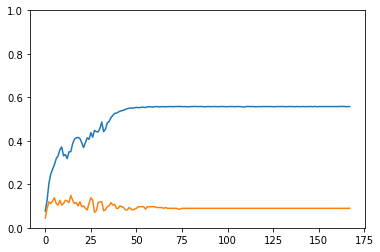

In [52]:
plt.ylim(0,1)
plt.plot(range(len(training_accs)), training_accs)
plt.plot(range(len(testing_accs)), testing_accs)

In [53]:
max(testing_accs)

0.14925373134328357